In [236]:
from pathlib import Path
import pandas as pd
import sys
import sklearn

results = pd.read_csv(Path() / "test.csv")
train = pd.read_csv(Path() / "train.csv")

In [237]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [238]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [239]:
train = train.drop(columns=["PassengerId", "Name", "Cabin", "Ticket"])

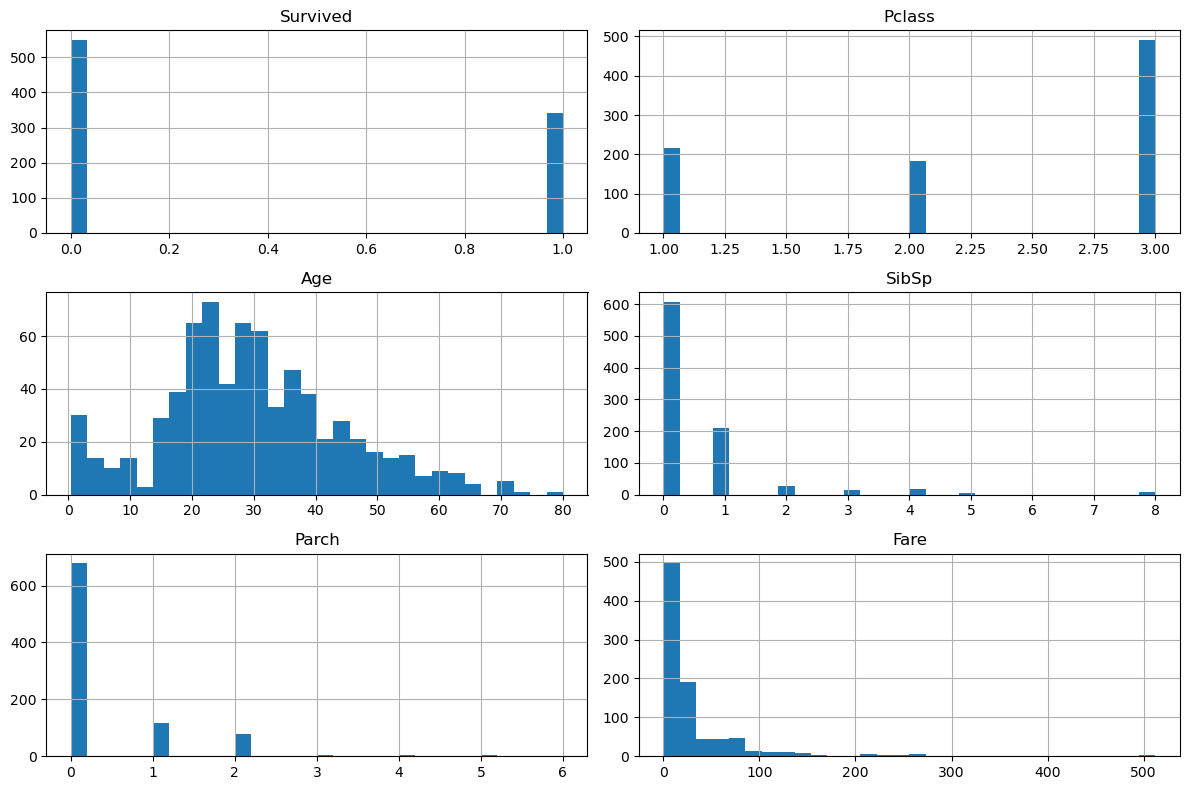

In [240]:
import matplotlib.pyplot as plt

IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

train.hist(bins=30, figsize=(12,8))
save_fig("histogram_plots")
plt.show()

In [241]:
corr_matrix = train.corr(numeric_only=True)

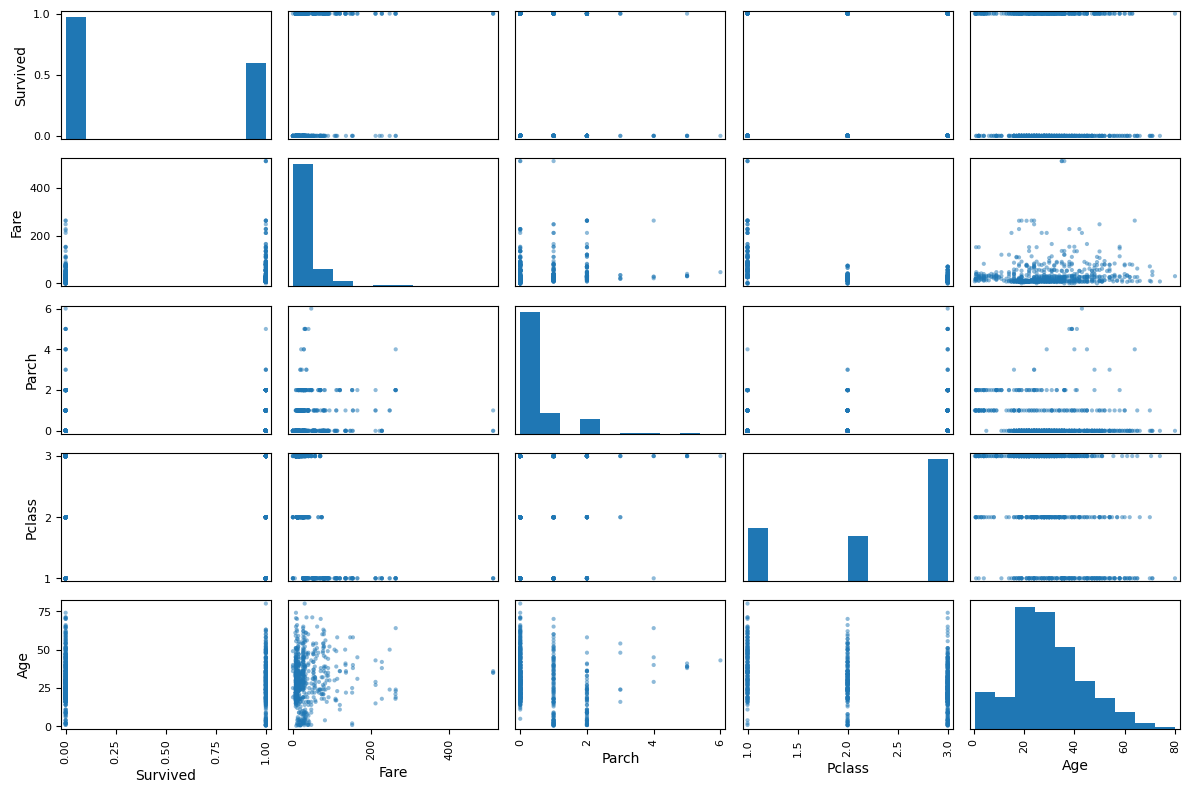

In [242]:
from pandas.plotting import scatter_matrix

attributes = ["Survived", "Fare", "Parch", "Pclass", "Age"]
scatter_matrix(train[attributes], figsize=(12, 8))
save_fig("scatter_matrix")
plt.show()

In [243]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

In [244]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [245]:
train_set_X = train.drop(columns=["Survived"])
train_set_y = train["Survived"].copy()

In [246]:
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

num_pipeline = Pipeline([("impute", SimpleImputer(strategy="median")), ("standardize", StandardScaler())])
cat_pipeline = Pipeline([("ordinal", OrdinalEncoder()), ("onehot", OneHotEncoder(handle_unknown="ignore"))])

num_attrib = ["Pclass", "Age", "SibSp", "Parch", "Fare"]
cat_attrib = ["Sex", "Embarked"]

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attrib),
    ("cat", cat_pipeline, cat_attrib)
])

In [247]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd, train_set_X, train_set_y, cv=3, scoring="accuracy")

array([0.79124579, 0.73063973, 0.78451178])

In [248]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

sgd_pred = cross_val_predict(sgd, train_set_X, train_set_y, cv=3)

cm = confusion_matrix(train_set_y, sgd_pred)
cm

array([[456,  93],
       [113, 229]], dtype=int64)

In [249]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(train_set_y, sgd_pred)


0.7111801242236024

In [250]:
recall_score(train_set_y, sgd_pred)

0.6695906432748538

In [251]:
f1_score(train_set_y, sgd_pred)

0.6897590361445783

In [252]:
from sklearn.metrics import precision_recall_curve

def scores(fun):
    pipe = make_pipeline(preprocessing, fun)
    pipe.fit(train_set_X, train_set_y)
    print("For", fun, "\n")
    print("cross val: ", cross_val_score(pipe, train_set_X, train_set_y, cv=3, scoring="accuracy"), "\n")
    pred = cross_val_predict(pipe, train_set_X, train_set_y, cv=3)
    print("confusion matrix:\n", confusion_matrix(train_set_y, pred), "\n")
    print("precision score: ", precision_score(train_set_y, pred), "\n")
    print("recall score: ", recall_score(train_set_y, pred), "\n")
    print("f1 score: ", f1_score(train_set_y, pred))

    y_scores = cross_val_predict(pipe, train_set_X, train_set_y, cv=3)

    precisions, recalls, thresholds = precision_recall_curve(train_set_y, y_scores)

    plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
    [...] # beautify the figure: add labels, grid, legend, arrow, and text
    plt.show()


For DummyClassifier() 

cross val:  [0.61616162 0.61616162 0.61616162] 

confusion matrix:
 [[549   0]
 [342   0]] 

precision score:  0.0 

recall score:  0.0 

f1 score:  0.0


c:\Users\carsy\anaconda3\envs\homl3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


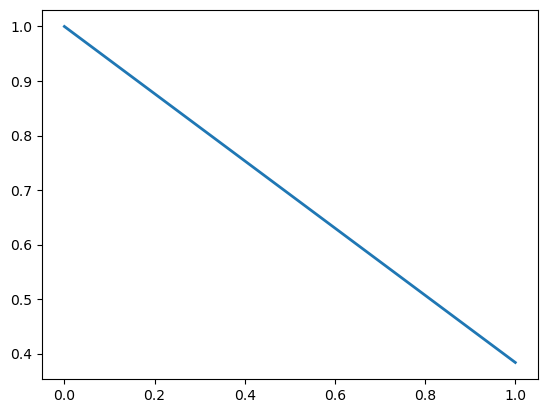

In [253]:
from sklearn.dummy import DummyClassifier
scores(DummyClassifier())

For SGDClassifier() 

cross val:  [0.76767677 0.78451178 0.8013468 ] 

confusion matrix:
 [[403 146]
 [ 76 266]] 

precision score:  0.6456310679611651 

recall score:  0.7777777777777778 

f1 score:  0.7055702917771883


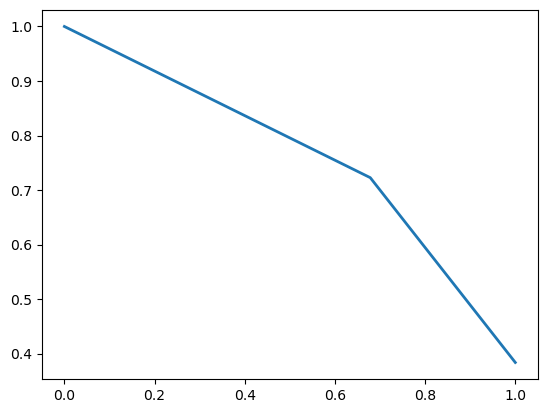

In [254]:
from sklearn.linear_model import SGDClassifier

scores(SGDClassifier())

For KNeighborsClassifier() 

cross val:  [0.77777778 0.78787879 0.79461279] 

confusion matrix:
 [[465  84]
 [106 236]] 

precision score:  0.7375 

recall score:  0.6900584795321637 

f1 score:  0.7129909365558913


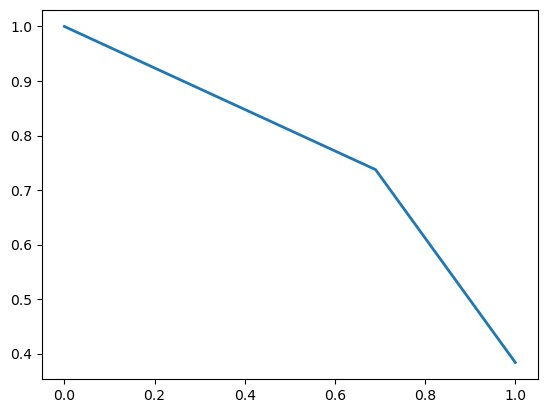

In [255]:
from sklearn.neighbors import KNeighborsClassifier

scores(KNeighborsClassifier())

For DecisionTreeClassifier() 

cross val:  [0.75420875 0.78114478 0.75084175] 

confusion matrix:
 [[448 101]
 [111 231]] 

precision score:  0.6957831325301205 

recall score:  0.6754385964912281 

f1 score:  0.685459940652819


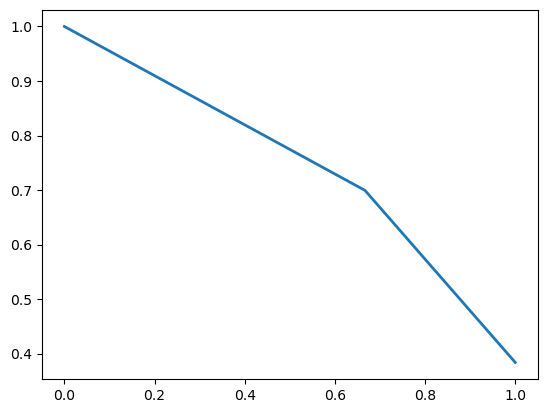

In [256]:
from sklearn.tree import DecisionTreeClassifier

scores(DecisionTreeClassifier())

For MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=1000, random_state=42) 

cross val:  [0.79461279 0.81144781 0.83164983] 



confusion matrix:
 [[493  56]
 [111 231]] 

precision score:  0.8048780487804879 

recall score:  0.6754385964912281 

f1 score:  0.7344992050874405


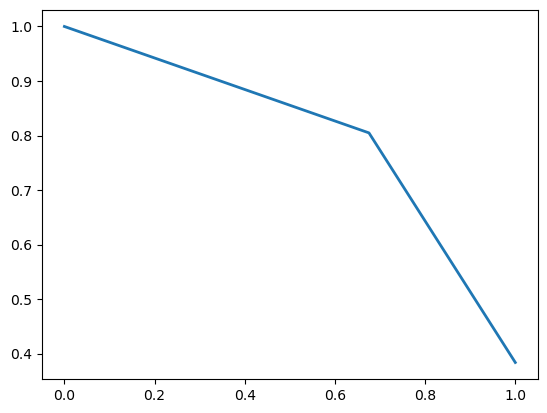

In [257]:
from sklearn.neural_network import MLPClassifier

scores(MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=(5, 2), random_state=42, max_iter=1000))

For MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=1000,
              random_state=42, solver='lbfgs') 

cross val:  [0.78451178 0.81144781 0.8013468 ] 

confusion matrix:
 [[482  67]
 [112 230]] 

precision score:  0.7744107744107744 

recall score:  0.672514619883041 

f1 score:  0.7198748043818467


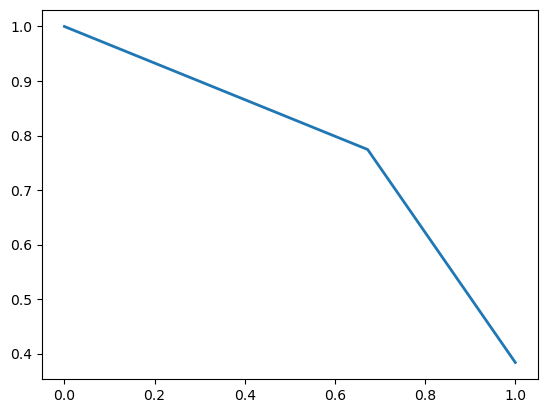

In [258]:
scores(MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=42, max_iter=1000))

For MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=1000,
              random_state=42, solver='sgd') 



cross val:  [0.61279461 0.78451178 0.82491582] 

confusion matrix:
 [[502  47]
 [184 158]] 

precision score:  0.7707317073170732 

recall score:  0.4619883040935672 

f1 score:  0.5776965265082267


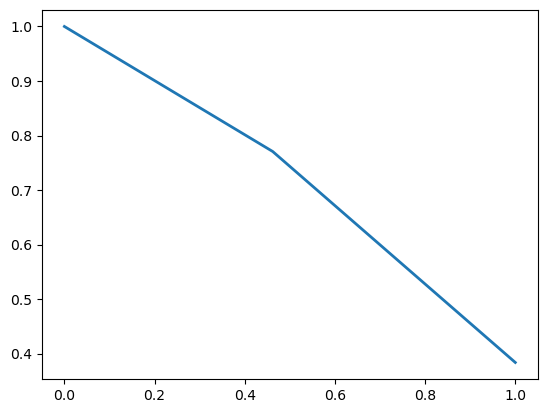

In [259]:
scores(MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=42, max_iter=1000))

For MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=1000, random_state=42) 



cross val:  [0.79461279 0.81144781 0.83164983] 

confusion matrix:
 [[493  56]
 [111 231]] 

precision score:  0.8048780487804879 

recall score:  0.6754385964912281 

f1 score:  0.7344992050874405


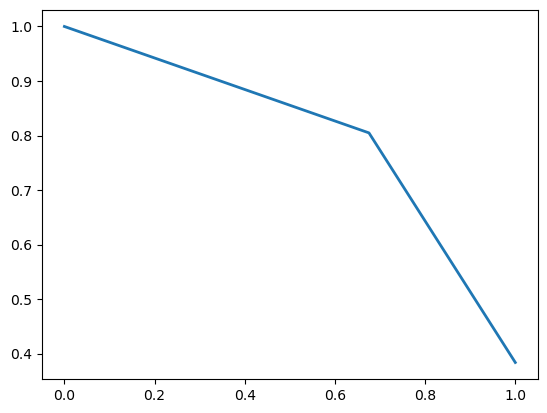

In [260]:
scores(MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=(5, 2), random_state=42, max_iter=1000))

For MLPClassifier(hidden_layer_sizes=(6, 3), max_iter=2000, random_state=42) 

cross val:  [0.79461279 0.83164983 0.83501684] 

confusion matrix:
 [[500  49]
 [111 231]] 

precision score:  0.825 

recall score:  0.6754385964912281 

f1 score:  0.7427652733118971


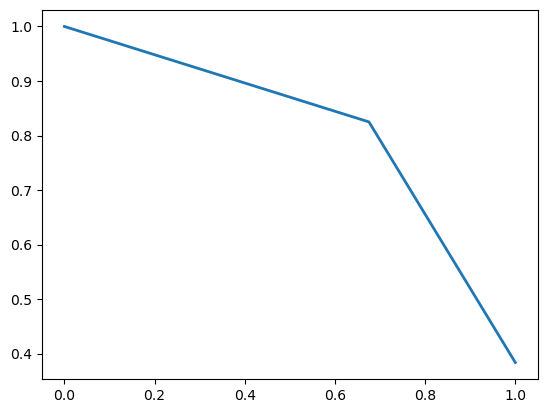

In [261]:
scores(MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=(6, 3), random_state=42, max_iter=2000))

In [262]:
mlp = Pipeline([("pre", preprocessing), ("mlp", MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=(6, 3), random_state=42, max_iter=3000))])

For RandomForestClassifier() 

cross val:  [0.77441077 0.83501684 0.78451178] 

confusion matrix:
 [[465  84]
 [ 98 244]] 

precision score:  0.7439024390243902 

recall score:  0.7134502923976608 

f1 score:  0.7283582089552239


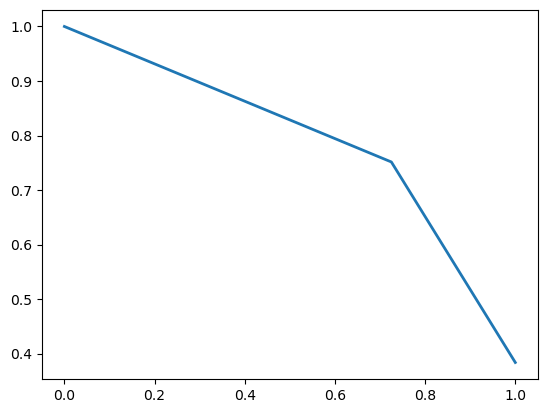

In [263]:
from sklearn.ensemble import RandomForestClassifier

scores(RandomForestClassifier())

For SVC() 

cross val:  [0.81144781 0.83501684 0.83838384] 

confusion matrix:
 [[492  57]
 [ 96 246]] 

precision score:  0.8118811881188119 

recall score:  0.7192982456140351 

f1 score:  0.7627906976744186


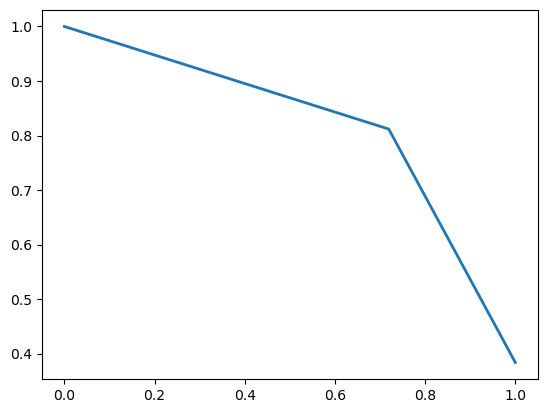

In [264]:
from sklearn.svm import SVC

scores(SVC())

In [265]:
from sklearn.model_selection import GridSearchCV

svc_pipe = Pipeline([("pre", preprocessing), ("svc", SVC())])

p_grid = {
    "svc__C": [1, 5, 10, 50, 100, 200, 500, 1000], 
    "svc__gamma": [0.001, 0.01, 0.1],
    "svc__kernel": ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']}

grid_search = GridSearchCV(svc_pipe, param_grid=p_grid, scoring='f1', cv=3)
grid_search.fit(train_set_X, train_set_y)

c:\Users\carsy\anaconda3\envs\homl3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
72 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\carsy\anaconda3\envs\homl3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\carsy\anaconda3\envs\homl3\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\carsy\anaconda3\envs\homl3\lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, 

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardize',
                                                                                          StandardScaler())]),
                                                                         ['Pclass',
                                                                          'Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('ordinal',
                                                                                          OrdinalEncoder()),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Sex',
                                                                          'Embarked'])])),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [1, 5, 10, 50, 100, 200, 500, 1000],
                         'svc__gamma': [0.001, 0.01, 0.1],
                         'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid',
                                         'precomputed']},
             scoring='f1')

In [266]:
grid_search.best_params_

{'svc__C': 200, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}

For SVC(C=500, gamma=0.01) 

cross val:  [0.82154882 0.83164983 0.82491582] 

confusion matrix:
 [[501  48]
 [107 235]] 

precision score:  0.8303886925795053 

recall score:  0.6871345029239766 

f1 score:  0.7519999999999999


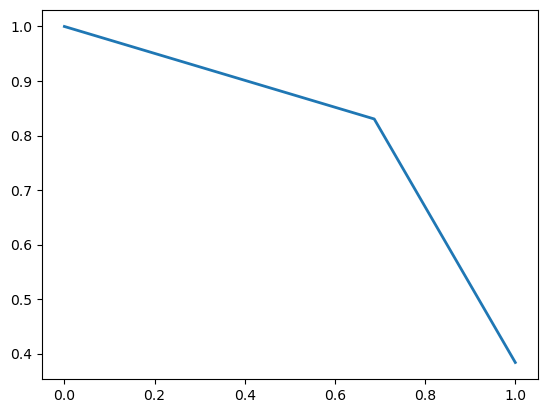

In [267]:
scores(SVC(C=500, gamma=0.01))

In [268]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(test_set_X)

In [269]:
rnd_search.best_params_

{'mlp__activation': 'relu',
 'mlp__hidden_layer_sizes': (100,),
 'mlp__learning_rate': 'constant'}

In [270]:
f1_score(test_set_y, final_predictions)


0.7058823529411764

In [271]:
import joblib
joblib.dump(final_model, "titanic.pkl")


['titanic.pkl']

In [272]:
results_predictions = final_model.predict(results)
prediction = pd.DataFrame(results_predictions, columns=['Survived'])
prediction.insert(0, "PassengerId", results['PassengerId'])

In [273]:
results['PassengerId']

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [274]:
prediction.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [275]:
prediction.to_csv('predictions.csv', index=False)